In [20]:
# initial setup for any notebook

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/yarcoh/projects/thesis-code4") # go to parent dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# imports

from src.general_methods.visualizer import Visualizer
from src.deep.data_analyzer import DataAnalyzer
from tqdm.notebook import tqdm

In [22]:
from src.general_methods.text_methods import is_this_a_notebook
is_this_a_notebook()

True

In [23]:
# configs

path = f'/data/yarcoh/thesis_data/data/datasets/c/500samples_10mu'
# mu = 0.15
# data_id = 0
n_permutations_for_ber = None # 50
is_box_plot = False

In [24]:
# load data
data_analyzer = DataAnalyzer(path, _tqdm=tqdm, is_box_plot=is_box_plot, verbose_level=1)

  0%|          | 0/50 [00:00<?, ?it/s]

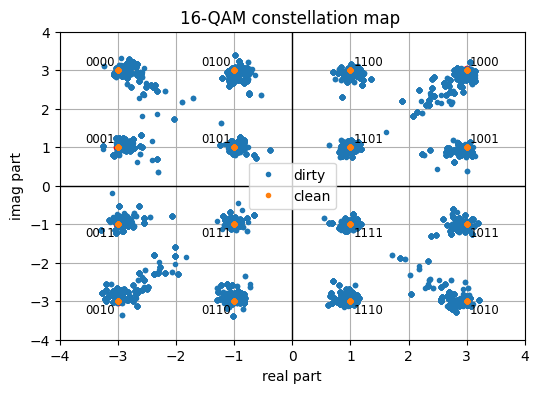

In [25]:
# plot single sample
mu = 0.38

# data_analyzer.plot_single_sample_b(mu=mu, data_id=0, is_save=False)
data_analyzer.plot_constelation(mu=mu, data_indices=range(0,50))

In [26]:
data_analyzer.clear_ber()

In [27]:
# plot full ber graph
data_analyzer.try_to_load_ber()

True

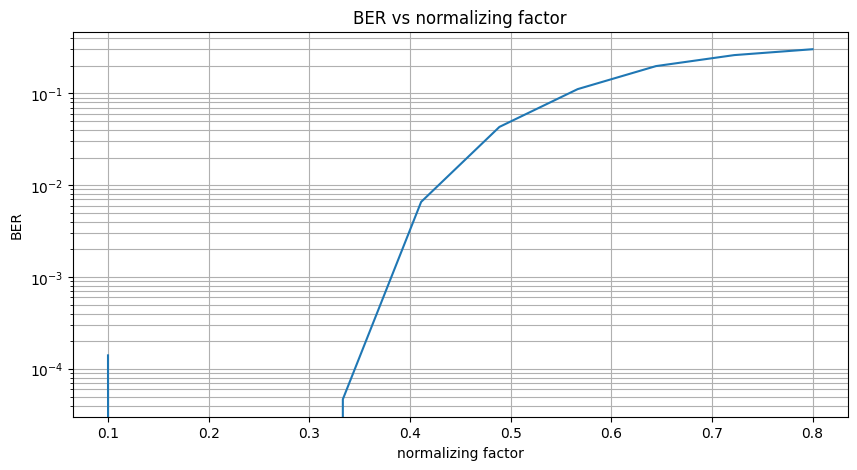

ber vs mu saved to /data/yarcoh/thesis_data/data/datasets/c/500samples_10mu/_analysis/ber_vs_mu.png


In [28]:
data_analyzer.plot_full_ber_graph(permute_limit=n_permutations_for_ber, is_save_fig=False, log_mu = False)

In [29]:
inp = input('saving BER over existing data, are you sure[y/n]?')
if inp == 'y':
    data_analyzer.calc_and_save_ber()
else:
    print('not saving ber')

not saving ber


In [30]:
# upload to wandb full ber graph
data_analyzer.wandb_log_ber_vs_mu(n=n_permutations_for_ber)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: yarden92. Use `wandb login --relogin` to force relogin


###  THE END